In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime
from api_keys import gkey

In [3]:
# Read file with weather API output and create DataFrame
file = "Output/weather.csv"
df_weather = pd.read_csv(file)
df_weather[['Date', 'Time']] = df_weather['time'].str.split('T', n=1, expand=True)

df_weather.head()

,Unnamed: 0,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,Time
0,0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,01:45:00
1,1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,04:45:00
2,2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,07:15:00
3,3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,09:00:00
4,4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,04:15:00


In [4]:
bins = df_weather['summary'].unique()

df_WeatherGrouped = df_weather.groupby(['summary','Date'], as_index=False).agg({'Trip ID': 'count', 'precipIntensity': 'mean', 'precipProbability': 'mean', 'temperature': 'mean', 'apparentTemperature': 'mean', 'windSpeed': 'mean'})
df_WeatherGrouped = df_WeatherGrouped.rename(columns = {'Trip ID':'Ride Count'})
df_WeatherGrouped.head()

,summary,Date,Ride Count,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
0,Clear,2013-01-04,4,0.0,0.0,16.6825,7.5875,6.4325
1,Clear,2013-01-07,1,0.0,0.0,21.5800,15.0100,4.8400
2,Clear,2013-01-14,1,0.0,0.0,12.4300,7.1200,3.0300
3,Clear,2013-01-16,2,0.0,0.0,22.8950,18.8150,4.5750
4,Clear,2013-01-18,1,0.0,0.0,19.2600,19.2600,0.3900


In [7]:
df_WeatherSummary = df_WeatherGrouped.groupby('summary').mean()
df_WeatherSummary = df_WeatherSummary.rename(columns = {'Ride Count': 'Average Rides/Day'})
df_WeatherSummary.head()


,Average Rides/Day,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
summary,,,,,,
Clear,1.935201,0.000016,0.002267,47.009398,45.539359,2.832922
Drizzle,1.271739,0.008432,0.560870,54.042364,53.140326,3.505752
Flurries,1.400000,0.003473,0.424000,33.241333,28.994667,5.823333
Foggy,1.714286,0.000111,0.023503,37.890146,35.039932,3.662639
Heavy Rain,2.000000,0.275550,0.970000,50.630000,50.630000,1.860000


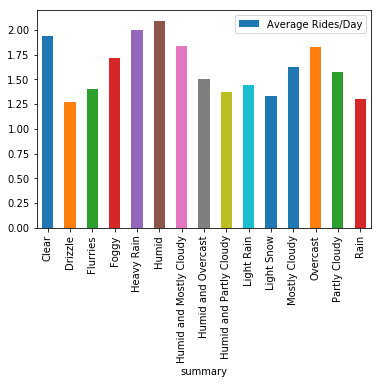

In [15]:
df_WeatherSummary.plot(kind='bar', y = 'Average Rides/Day')


,Average Rides/Day
Temp Range,
-35 to -30,1.000000
-30 to -25,1.000000
-25 to -20,1.000000
-20 to -15,2.000000
-15 to -10,1.250000
-10 to -5,1.545455
-5 to 0,1.764706
0 to 5,1.757576
5 to 10,1.704545


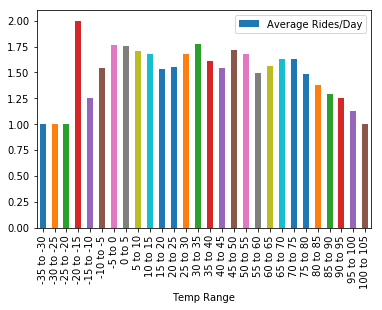

In [305]:
tbins = np.arange(int(min(df_weather['apparentTemperature'])/5-1)*5, 
                  int(max(df_weather['apparentTemperature'])/5+2)*5, 5)

# create bin labels
tbin_names = [f"{tbins[i]} to {tbins[i+1]}" for i in range(len(tbins)-1)]
    
df_TempRides = df_weather
df_TempRides['Temp Range'] = pd.cut(df_weather['apparentTemperature'], tbins, labels=tbin_names)
df_TempRides = df_TempRides.groupby(['Temp Range', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_TempRides = df_TempRides.groupby('Temp Range').mean()
df_TempRides = df_TempRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_TempRides.plot(kind='bar', y = 'Average Rides/Day')
df_TempRides

,Average Rides/Day
Precipitation,
0,2.542243
0.0 to 0.1,1.899254
0.1 to 0.2,1.166667
0.2 to 0.3,1.000000
0.3 to 0.4,1.000000


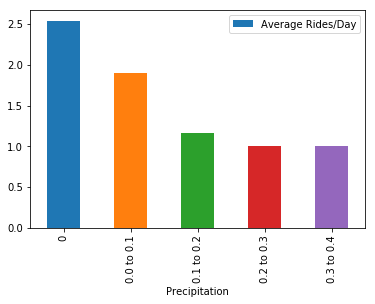

In [306]:
precipitation_bins = np.arange(int(min(df_weather['precipIntensity'])/0.1-1)*0.1, 
                               int(max(df_weather['precipIntensity'])/0.1+2)*0.1, 0.1)
# create bin labels
pr_names = [f"{precipitation_bins[i]:.2} to {precipitation_bins[i+1]:.2}" for i in range(0,len(precipitation_bins)-1)]
pr_names[0]=0

df_PreRides = df_weather
df_PreRides['Precipitation'] = pd.cut(df_weather['precipIntensity'], precipitation_bins, labels=pr_names)
df_PreRides = df_PreRides.groupby(['Precipitation', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_PreRides = df_PreRides.groupby('Precipitation').mean()
df_PreRides = df_PreRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_PreRides.plot(kind='bar', y = 'Average Rides/Day')
df_PreRides

,Average Rides/Day
Winds,
0,1.000000
0 to 5,2.413230
5 to 10,1.898810
10 to 15,1.722222
15 to 20,1.000000
20 to 25,1.000000


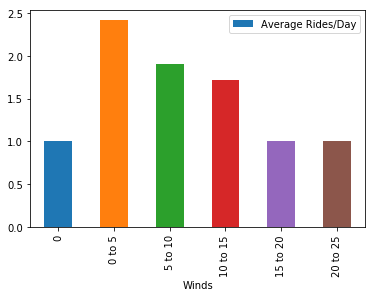

In [307]:
wind_bins = np.arange(int(min(df_weather['windSpeed'])/5-1)*5, int(max(df_weather['windSpeed'])/5+2)*5, 5)

# create bin labels
wind_names = [f"{wind_bins[i]} to {wind_bins[i+1]}" for i in range(0, len(wind_bins)-1)]
wind_names[0] = 0
    
df_WindRides = df_weather
df_WindRides['Winds'] = pd.cut(df_weather['windSpeed'], wind_bins, labels=wind_names)
df_WindRides = df_WindRides.groupby(['Winds', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_WindRides = df_WindRides.groupby('Winds').mean()
df_WindRides = df_WindRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_WindRides.plot(kind='bar', y = 'Average Rides/Day')
df_WindRides